In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(670)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
665,1,112,80,45,132,34.8,0.217,24,0
666,4,145,82,18,0,32.5,0.235,70,1
667,10,111,70,27,0,27.5,0.141,40,1
668,6,98,58,33,190,34.0,0.430,43,0


In [5]:
len(data[data['Outcome'] == 0])

500

In [6]:
train = data.head(int(len(data)*0.8))
test = data.tail(int(len(data)*0.2))

Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.

In [7]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

In [8]:
from sklearn.tree import DecisionTreeClassifier

Обучите классификатор используя блок Two-Class Boosted Decision Tree с параметрами
Maximum number of leaves per tree = 10,
Minimum number of samples per leaf node = 10,
Learning rate = 0.1,
Number of trees constructed = 1,
Random number seed = 2020.

In [9]:
tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 10, min_samples_leaf = 10, random_state = 2020)
clf=tree.fit(x, y)

In [10]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'


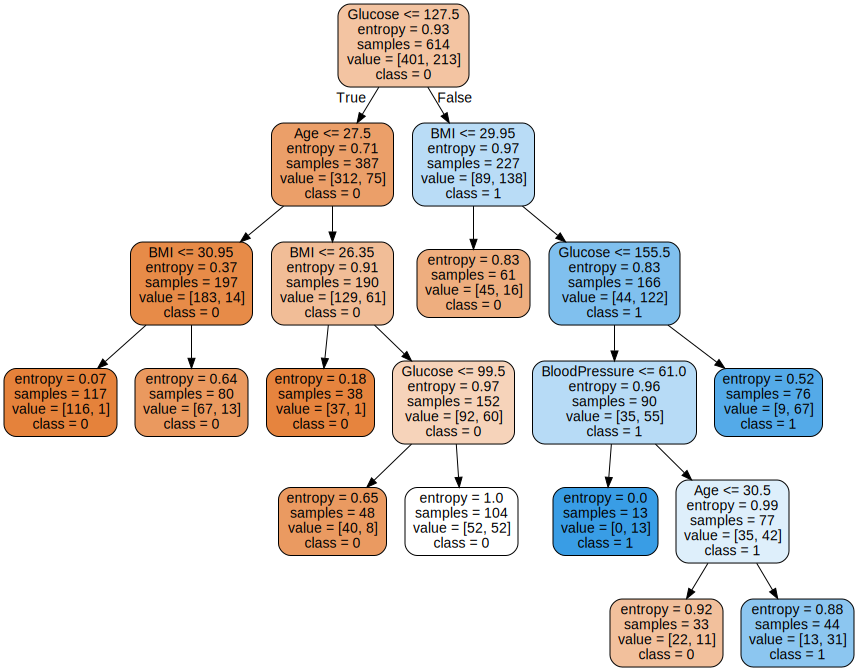

In [11]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [12]:
clf.tree_.max_depth

5

In [13]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7516339869281046

In [15]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.6969349457881567

Pregnancies                  11.000
Glucose                     120.000
BloodPressure                80.000
SkinThickness                37.000
Insulin                     150.000
BMI                          42.300
DiabetesPedigreeFunction      0.785
Age                          48.000
Name: 740, dtype: float64

In [23]:
num = 739
#data.loc[num, features]
clf.predict([data.loc[num, features].tolist()])[0]

c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [26]:
#с index-1 не рабоатет

print(clf.predict([data.loc[712, features].tolist()])[0])
print(clf.predict([data.loc[749, features].tolist()])[0])
print(clf.predict([data.loc[703, features].tolist()])[0])
print(clf.predict([data.loc[740, features].tolist()])[0])

1
0
1
0


c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
